In [2]:
import json
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [5]:
with open("isharesSmall.json") as file:
    data = json.loads(file.read())["data"]
df = pl.DataFrame(data)
df.drop(["bidPrice","esgRating", "esgClassification", "esg.suiteCategory", "effectiveDuration", "modelOad_effectiveDuration", "productPageUrl", "productType", "sfdr", "wtdAvgCarbonIntensity" ])
df

assetClass,bidPrice,calendarFiveYear,calendarFourYear,calendarOneYear,calendarPerfAsOfdate,calendarThreeYear,calendarTwoYear,country,discreteFiveYear,discreteFourYear,discreteOneYear,discretePerfAsOfdate,discreteThreeYear,discreteTwoYear,distYield,effectiveDuration,esg.suiteCategory,esgClassification,esgMsciQualityScore,esgRating,fundName,inceptionDate,investmentStyle,investorClassName,isin,localExchangeTicker,marketType,modelOad,modelOad_effectiveDuration,navAmount,navAmountAsOf,navAnnualisedAsOf,navFiveYear,navFiveYearAnnualized,navInception,navOneYearAnnualized,navPerfAsOf,navSinceInceptionAnnualized,navSixMonth,navTenYear,navTenYearAnnualized,navThreeYear,navThreeYearAnnualized,navTwoYearAnnualized,navYearToDate,onGoingCharges,portfolioId,productPageUrl,productType,region,sfdr,strategy,subAssetClass,ter,totalFundSizeInMillions,totalNetAssets,useOfProfits,wtdAvgCarbonIntensity,yieldToWorst
str,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,str,f64,f64,f64,f64,null,str,f64,str,str,str,list[str],str,str,str,str,f64,f64,f64,i64,str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,list[str],str,struct[2],struct[2],f64,str,f64,f64
"""Reddito Fisso""",null,5.471153,-2.528352,4.780172,"""2024-12-31""",-16.185853,8.996889,"""Spagna""",4.287245,-5.591642,3.891879,"""2025-03-31""",-8.963165,5.974903,null,6.90503,null,null,5.6348,"""BBB""","""iShares Spain Govt Bond UCITS …","""2018-04-19""","[""Passivo""]","""Hedged""","""IE00BFMM8Y81""","""SPEH""","""Sviluppati""",6.90503,6.90503,5.641877,20250606,"""2025-05-31""",-0.868494,-0.174305,13.411127,7.202073,"""2025-05-31""",1.784806,0.415,null,null,8.242105,2.675165,6.004953,1.630508,0.22,296967,"""/it/investitore-privato/it/pro…","""ISHARES_FUND_DATA""","""Europa""","""Altro""","[""Copertura valutaria""]","""Governativi""","{0.22,0.22}","{""2025-06-06"",631.291237}",9655667.5,"""Ad Accumulazione""",3.96,2.79
"""Azionario""",null,140.238605,-24.074218,-26.073695,"""2024-12-31""",-5.613077,-20.528361,"""Generale""",150.755166,-9.748837,-17.560394,"""2025-03-31""",-7.758584,-28.499843,1.308266,null,null,"""Tematici""",7.1898,"""AA""","""iShares Global Clean Energy Tr…","""2007-07-06""","[""Passivo""]",null,"""IE00B1XNHC34""","""INRG""","""Sviluppati""",null,null,7.393275,20250606,"""2025-05-31""",11.068384,2.121713,-63.995304,-13.999549,"""2025-05-31""",-5.547035,3.28668,22.835022,2.078016,-34.515578,-13.161429,-15.801427,11.159615,0.65,251911,"""/it/investitore-privato/it/pro…","""ISHARES_FUND_DATA""","""Globale""","""Art. 8""","[""Non tradizionali"", ""Strategie sostenibili"", ""Tematici""]","""Tutte le capitalizzazioni""","{0.65,0.65}","{""2025-06-06"",2101.216628}",1.9750e9,"""Distribuzione""",151.98,null
"""Azionario""",null,3.828312,21.697192,9.424887,"""2024-12-31""",-18.93178,14.409931,"""Generale""",49.050646,2.784996,9.670501,"""2025-03-31""",-3.199367,10.85355,2.725799,null,null,null,null,null,"""iShares MSCI Europe Mid Cap UC…","""2017-06-06""","[""Passivo""]",null,"""IE00BYXYX745""","""EMID""","""Sviluppati""",null,null,7.107063,20250606,"""2025-05-31""",71.632821,11.408947,68.862414,15.400658,"""2025-05-31""",6.772986,13.891239,null,null,33.064082,9.990104,15.934835,14.281938,0.15,287745,"""/it/investitore-privato/it/pro…","""ISHARES_FUND_DATA""","""Europa""","""Altro""",null,"""Media capitalizzazione""","{0.15,0.15}","{""2025-06-06"",414.44803}",1.6579947e7,"""Distribuzione""",null,null
"""Azionario""",null,-19.613776,2.379882,-1.930839,"""2024-12-31""",-12.433337,7.488979,"""Generale""",28.627075,-3.617885,-2.342586,"""2025-03-31""",-3.668166,4.756982,3.045086,null,null,null,4.8345,"""BBB""","""iShares EM Infrastructure UCIT…","""2008-02-15""","[""Passivo""]",null,"""IE00B2NPL135""","""IEMI""","""Emergenti""",null,null,16.220282,20250606,"""2025-05-31""",21.49973,3.97168,-2.077226,5.239254,"""2025-05-31""",-0.12132,12.379534,-15.334718,-1.650867,6.378565,2.082518,7.054485,11.317411,0.74,251910,"""/it/investitore-privato/it/pro…","""ISHARES_FUND_DATA"

In [6]:
# Loads isharesHoldings and create mapping between pid and ising
with open("isharesHoldings.json") as file:
    holdings = json.loads(file.read())["data"]

pid_to_isin = {s["portfolioId"]: s["isin"] for s in data}

In [7]:
portfolio_composition = {"DE0002635307": 0.33, "IE00B441G979": 0.33, "IE00BMG6Z448": 0.34}

In [9]:
# slice portfolio --------------------------------------------------------------
portfolio = df.filter(pl.col("isin").is_in(list(portfolio_composition)))
portfolio

assetClass,bidPrice,calendarFiveYear,calendarFourYear,calendarOneYear,calendarPerfAsOfdate,calendarThreeYear,calendarTwoYear,country,discreteFiveYear,discreteFourYear,discreteOneYear,discretePerfAsOfdate,discreteThreeYear,discreteTwoYear,distYield,effectiveDuration,esg.suiteCategory,esgClassification,esgMsciQualityScore,esgRating,fundName,inceptionDate,investmentStyle,investorClassName,isin,localExchangeTicker,marketType,modelOad,modelOad_effectiveDuration,navAmount,navAmountAsOf,navAnnualisedAsOf,navFiveYear,navFiveYearAnnualized,navInception,navOneYearAnnualized,navPerfAsOf,navSinceInceptionAnnualized,navSixMonth,navTenYear,navTenYearAnnualized,navThreeYear,navThreeYearAnnualized,navTwoYearAnnualized,navYearToDate,onGoingCharges,portfolioId,productPageUrl,productType,region,sfdr,strategy,subAssetClass,ter,totalFundSizeInMillions,totalNetAssets,useOfProfits,wtdAvgCarbonIntensity,yieldToWorst
str,f64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,str,f64,f64,f64,f64,null,str,f64,str,str,str,list[str],str,str,str,str,f64,f64,f64,i64,str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,list[str],str,struct[2],struct[2],f64,str,f64,f64
"""Azionario""",null,-1.891177,25.05805,8.958906,"""2024-12-31""",-10.442956,16.023975,"""Generale""",37.045335,8.633629,7.065469,"""2025-03-31""",3.272515,15.229629,2.544557,null,null,null,7.7871,"""AA""","""iShares STOXX Europe 600 UCITS…","""2004-02-13""","[""Passivo""]",null,"""DE0002635307""","""EXSA""","""Sviluppati""",null,null,55.6915,20250606,"""2025-05-31""",79.656314,12.431627,327.518758,8.999036,"""2025-05-31""",7.059737,9.854941,81.851772,6.162651,34.889602,10.49081,13.425178,10.373381,0.2,251931,"""/it/investitore-privato/it/pro…","""ISHARES_FUND_DATA""","""Europa""","""Altro""",null,"""Tutte le capitalizzazioni""","{0.2,0.2}","{""2025-06-06"",8718.16368}",8.0024e9,"""Distribuzione""",79.41,null
"""Azionario""",null,null,null,3.639713,"""2024-12-31""",-19.354891,19.732112,"""Generale""",null,null,-1.732227,"""2025-03-31""",-13.462901,19.944807,null,null,null,null,6.1695,"""A""","""iShares MSCI EM ex-China UCITS…","""2021-04-26""","[""Passivo""]",null,"""IE00BMG6Z448""","""EXCH""","""Emergenti""",null,null,5.626149,20250606,"""2025-05-31""",null,null,8.735022,8.562824,"""2025-05-31""",2.067779,5.808439,null,null,18.357937,5.77892,12.087251,7.092287,0.18,315592,"""/it/investitore-privato/it/pro…","""ISHARES_FUND_DATA""","""Globale""","""Altro""",null,"""Grande/Media Capitalizzazione""","{0.18,0.18}","{""2025-06-06"",2676.060413}",2.4937e9,"""Ad Accumulazione""",344.27,null
"""Azionario""",null,11.456729,22.884004,19.490071,"""2024-12-31""",-18.126791,20.629425,"""Generale""",48.432173,10.333226,5.700434,"""2025-03-31""",-8.041628,23.923729,null,null,null,null,6.75,"""A""","""iShares MSCI World EUR Hedged …","""2010-09-30""","[""Passivo""]",null,"""IE00B441G979""","""IWDE""","""Sviluppati""",null,null,95.335775,20250606,"""2025-05-31""",79.712018,12.438599,278.895075,10.658943,"""2025-05-31""",9.507654,0.056848,120.574258,8.23195,37.200119,11.118106,16.741432,2.16227,0.55,251891,"""/it/investitore-privato/it/pro…","""ISHARES_FUND_DATA""","""Globale""","""Altro""","[""Copertura valutaria""]","""Grande/Media Capitalizzazione""","{0.55,0.55}","{""2025-06-06"",4149.012944}",4.1490e9,"""Ad Accumulazione""",92.96,null


# Geography

In [10]:
geo = (
    pl.from_dicts(
        {
            "country": h2["country"],
            "w": portfolio_composition[pid_to_isin[h["portfolioId"]]] * h2["weight"],
        }
        for h in holdings
        if pid_to_isin[h["portfolioId"]] in portfolio_composition
        for h2 in h["holdings"]
    )
    .group_by("country")
    .sum()
    .sort("w", descending=True)
)

geo = dict(zip(geo["country"], geo["w"]))

In [11]:
def plot_pie(
    data: dict,
    *,  # keyword-only for clarity
    min_pct_other=1.0,  # <–– slices below this % are folded into “Altri”
    thin_threshold=5.0,  # <–– % below which labels go outside
    label_r=0.75,  # <–– radius for BIG-slice labels (0 = centre, 1 = rim)
):
    vals = np.array(list(data.values()), dtype=float)
    labels = np.array(list(data.keys()))
    pct = vals / vals.sum() * 100

    # Collapse tiny slices into “Altri”
    mask_small = pct < min_pct_other
    if mask_small.any():
        vals = np.append(vals[~mask_small], vals[mask_small].sum())
        labels = np.append(labels[~mask_small], "Altri")
        pct = vals / vals.sum() * 100  # recompute %

    fig, ax = plt.subplots(figsize=(6, 6))
    wedges = ax.pie(
        vals,
        startangle=90,
        counterclock=False,
        colors=plt.cm.tab20c(np.arange(len(vals)) % 20),
    )[0]

    for v, p, lbl, w in zip(vals, pct, labels, wedges):
        ang = np.deg2rad((w.theta1 + w.theta2) / 2)  # mid-angle
        x, y = np.cos(ang), np.sin(ang)

        if p >= thin_threshold:  # big slice – inside
            ax.text(
                label_r * x,
                label_r * y,
                f"{lbl}\n{p:.1f}%",
                ha="center",
                va="center",
                fontsize=8,
            )
        else:  # thin slice – outside
            ax.annotate(
                f"{lbl}  {p:.1f}%",
                xy=(x, y),
                xytext=(1.25 * x, 1.25 * y),
                ha="left" if x > 0 else "right",
                va="center",
                fontsize=8,
                arrowprops=dict(
                    arrowstyle="-", connectionstyle="angle3,angleA=0,angleB=90"
                ),
            )

    plt.tight_layout()
    plt.show()


# EXAMPLE

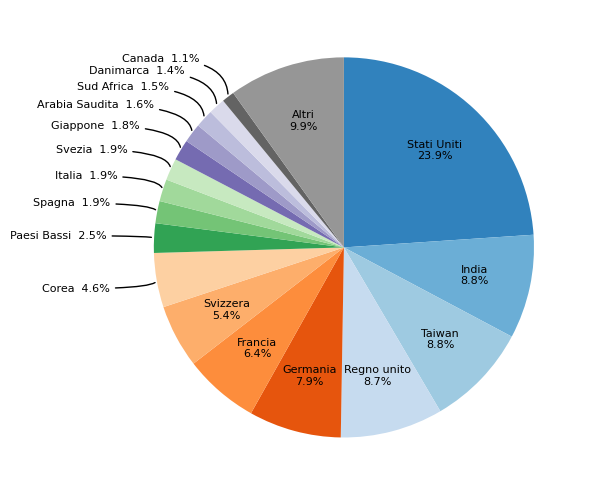

In [12]:
plot_pie(geo, min_pct_other=1, thin_threshold=5.0, label_r=0.7)

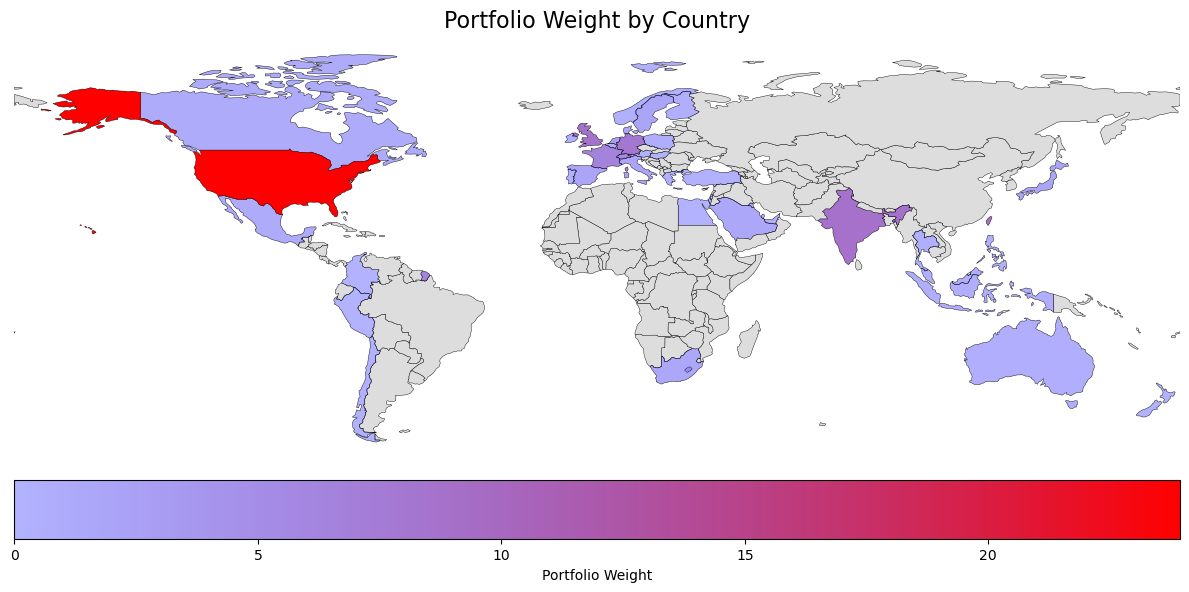

In [13]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize,LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

# Carica GeoJSON (pre-scaricato da Natural Earth come countries.geojson)
with open("countries.geojson", "r") as f:
    data = json.load(f)

cmap = LinearSegmentedColormap.from_list(
    "BlueRedAlpha", [(0, 0, 1, 0.3), (1, 0, 0, 1.0)]
)

norm = Normalize(vmin=0, vmax=max(geo.values()))

patches, colors = [], []
for feat in data["features"]:
    name = feat["properties"]["NAME_LONG"]
    if name in ("Antarctica", "Groenlandia"):
        continue

    w = geo.get(name, 0)
    facecolor = cmap(norm(w)) if w > 0 else "#dddddd"
    geom = feat["geometry"]

    # Gestisci Polygon e MultiPolygon
    shape_list = (
        [geom["coordinates"]] if geom["type"] == "Polygon" else geom["coordinates"]
    )
    for poly_coords in shape_list:
        exterior = poly_coords[0]
        patch = Polygon(exterior, closed=True)
        patches.append(patch)
        colors.append(facecolor)

fig, ax = plt.subplots(figsize=(12, 6))
pc = PatchCollection(patches, facecolor=colors, edgecolor="black", linewidths=0.3)
ax.add_collection(pc)
ax.set_xlim(-180, 180)
ax.set_ylim(-60,90)
ax.axis("off")

# Colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("Portfolio Weight")

plt.title("Portfolio Weight by Country", fontsize=16)
plt.tight_layout()
plt.show()

# Sectors

In [14]:
sectors = (
    pl.from_dicts(
        {
            "sector": h2["sector"],
            "w": portfolio_composition[pid_to_isin[h["portfolioId"]]] * h2["weight"],
        }
        for h in holdings
        if pid_to_isin[h["portfolioId"]] in portfolio_composition
        for h2 in h["holdings"]
    )
    .group_by("sector")
    .sum()
    .sort("w", descending=True)
)
sectors = dict(zip(sectors["sector"], sectors["w"]))
sectors

{'Finanziari': 23.7413158,
 'IT': 20.4883926,
 'Industriali': 12.430173300000002,
 'Salute': 8.610771500000002,
 'Consumi Discrezionali': 8.264186800000001,
 'Generi di largo consumo': 6.733561300000001,
 'Comunicazione': 5.454348099999999,
 'Materiali': 4.9678516,
 'Energia': 3.9211915999999998,
 'Imprese di servizi di pubblica utilità': 2.9875972000000006,
 'Immobili': 1.6400629,
 'Liquidità e/o derivati': 0.7605502000000001}

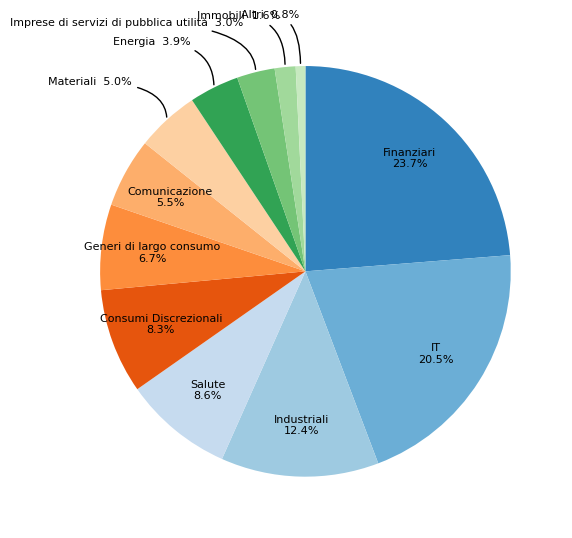

In [15]:
plot_pie(sectors)